![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto Integrador**

## **Introducción**

¡Bienvenidos a nuestro proyecto integrador! Durante estos días estarán poniendo en práctica sus habilidades en el campo del aprendizaje automático. Deberán entender la problemática y comprender los datos, realizar el análisis exploratorio de datos, preparar los datos, para luego experimentar con los modelos de machine learning en un contexto real. Finalmente, usarán las métricas correspondientes para medir el performance de los modelos y seleccionar el mejor. 

Vale la pena destacar, que puede realizarse por equipos y que este proyecto no será revisado. El objetivo es poner en práctica los conceptos que se van adelantando en el M6, previo a la etapa de Labs que están por comenzar. Por tanto, es un proyecto que podrán tener un su portafolio personal, pero no tiene calificación cuantitativa. 

Este proyecto constará de tres fases: `Análisis exploratorio de datos`, `Preparación de datos` y `Modelamiento y evaluación`.




### 1. Análisis exploratorio de datos

Machine Learning en Medicina: Al aplicar Machine Learning en Medicina se pueden usar las herramientas informáticas, con el fin de conseguir información a partir de los datos, por ejemplo, de historias clínicas o registros de prestadores de servicios de salud. De esta manera, se pueden emitir diagnósticos predicitivos, evaluar la efectividad de estrategias de intervención y anticipar comportamientos en escenarios relacionados con la atención. 

## **Planteamiento de la problemática**

Hemos sido contratados en el equipo de ciencia de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de atención en salud para un importante hospital. **Nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización.** Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento. Dado que tienen en su base de datos algunos datos referentes a los pacientes y resultados de exámenes diagnósticos, de pacientes hospitalizados y no hospitalizados, nos han entregado esta información.  

Para ello, nuestro departamento de datos ha recopilado `Antecedentes del paciente`, `Morbilidad asociada al paciente` y `Antecedentes relacionados con la toma de la biopsia`y `Complicaciones infecciosas`. En la siguiente tabla, se encuentra un diccionario de datos asociado:

![image](https://user-images.githubusercontent.com/118769777/220240501-8c21461d-2de5-495b-954e-10fb9bf38014.png)

El departamente de datos advierte que hay algunos problemas de calidad de datos en la información suministrada por lo que el primer reto del equipo es realizar un análisis exploratorio de los datos con el fin de transformar y preparar las datos adecuadamente. 


## **Formato de entrega**

Deben tener el código en un script .py o Jupyter Notebook .ipynb. Es muy importante explicar claramente cada paso realizado mediante comentarios en el script o textos formato markdown dentro del Notebook, pensar que cualquier persona debe entender de la mejor manera posible cada razonamiento y pasos aplicados.

Recuerden, además, que deben crear el repositorio que contenga el proyecto, por lo que es importante que le dediquen tiempo también a esta parte, dejando todo ordenado y con un README acorde, que sirva de introducción al contenido dentro de este. Recuerden que nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización y crear un modelo predictivo de clasificación para la variable objetivo: Hospitalización.


# Analisis exploratorio

In [529]:
# importamos lo necesario para hacer esta parte del analisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [530]:
# ahora veamos la base de datos

df = pd.read_excel('BBDD_Hospitalización.xlsx')
df.head()

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [531]:
df.isna().sum().sort_values(ascending=False)

AGENTE AISLADO                                                               19
PSA                                                                           6
HOSPITALIZACION                                                               5
BIOPSIAS PREVIAS                                                              4
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
VOLUMEN PROSTATICO                                                            3
CUP                                                                           3
EDAD                                                                          2
ITU                                                                           2
DIAS HOSPITALIZACION MQ                                                       2
PATRON DE RESISTENCIA                                                         2
TIPO DE CULTIVO                                                               2
BIOPSIA                                 

In [532]:
df.shape

(570, 20)

In [533]:
df[df.isna().any(axis=1)] #veamos los registros nans

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
99,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
100,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
106,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
109,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [534]:
df.drop(index=df[df.ITU.isna()].index,inplace=True) #eliminamos los registros de ITU ya que vimos que tenian toda la fila Nan
print(df.isna().sum().sort_values(ascending=False)) #volvemos a contar y visualizar
df[df.isna().any(axis=1)]

AGENTE AISLADO                                                               17
PSA                                                                           4
HOSPITALIZACION                                                               3
BIOPSIAS PREVIAS                                                              2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
VOLUMEN PROSTATICO                                                            1
CUP                                                                           1
EDAD                                                                          0
ITU                                                                           0
DIAS HOSPITALIZACION MQ                                                       0
PATRON DE RESISTENCIA                                                         0
TIPO DE CULTIVO                                                               0
BIOPSIA                                 

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
99,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
100,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
106,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
109,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [535]:
print(f'Son un total de {df[df.isna().any(axis=1)].EDAD.count()} registros, un porcentaje de registros con faltantes de: {df[df.isna().any(axis=1)].EDAD.count()/len(df)*100:.2f}%')

#demasiados para eliminar, completemos los registros menos significativos y con mas nans:
#ademas, los valores numericos llenemolos con promedios:
df['AGENTE AISLADO'].unique()

Son un total de 27 registros, un porcentaje de registros con faltantes de: 4.75%


array(['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA', nan], dtype=object)

In [536]:
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].fillna('NO')
df.drop(index=df[df.HOSPITALIZACION.isna()].index,inplace=True)


In [537]:
print(df.isna().sum().sort_values(ascending=False))

PSA                                                                          4
BIOPSIAS PREVIAS                                                             2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            2
VOLUMEN PROSTATICO                                                           1
CUP                                                                          1
EDAD                                                                         0
ITU                                                                          0
DIAS HOSPITALIZACION MQ                                                      0
HOSPITALIZACION                                                              0
PATRON DE RESISTENCIA                                                        0
AGENTE AISLADO                                                               0
TIPO DE CULTIVO                                                              0
BIOPSIA                                             

In [538]:
print(f'Son un total de {df[df.isna().any(axis=1)].EDAD.count()} registros, un porcentaje de registros con faltantes de: {df[df.isna().any(axis=1)].EDAD.count()/len(df)*100:.2f}%')


Son un total de 8 registros, un porcentaje de registros con faltantes de: 1.42%


In [539]:
#ahora si eliminamos

df.dropna(inplace=True)
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [540]:
#veamos los valores unicos por columna
for i in df.columns:
    print(i)
    print(df[i].unique())

EDAD
[ 53.  56.  57.  55.  67.  69.  54.  68.  43.  65.  62.  71.  64.  77.
  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.  70.
  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.  80.
  45.  82.]
DIABETES
['NO' 'SI']
HOSPITALIZACIÓN ULTIMO MES
['NO' 'SI']
PSA
[  4.     7.7   29.     7.     6.2    6.     5.7    4.3    5.19   4.5
  14.    10.     9.    25.    91.8   21.    98.     7.5   10.5   90.
   5.1   16.    17.    23.     6.4  100.     5.8   38.9   20.    40.
   9.5    9.6   10.2    8.5   53.    19.     5.6    3.5   15.     5.2
  17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7   18.    27.
   5.     8.39   4.79   6.8    4.9   16.2    8.3    6.5    7.2    5.97
   6.98  12.    24.     8.9    6.3    9.3   12.6    5.5   13.8   13.4
  11.    21.3    7.1   11.9    3.8   15.6    5.4   22.    12.8   10.8
   4.1    2.     9.4    4.49  11.5    5.31  33.6   48.3    5.11   8.8
  26.     0.6   31.    27.6   83.    15.85  20.2   14.9    2.5    3.9
  18.2  

In [541]:
#reemplacemos para simplificar y corregir todos los valores
df.replace(['HEMOCULTIVO','UROCULTIVO','HEMOCULTIVO Y UROCULTIVO'],'SI',inplace=True)
df.replace('FLUOROQUINOLONA_AMINOGLICÓSIDO','FLUOROQUINOLONA_AMINOGLICOSIDO',inplace=True)
df.replace('SI, EPOC','SI',inplace=True)
df.replace('SI, ASMA','SI',inplace=True)
df.replace(['ADENOCARCINOMA GLEASON 6',
            'ADENOCARCINOMA GLEASON 7',
            'ADENOCARCINOMA GLEASON 10 ',
            'ADENOCARCINOMA GLEASON 9 ',
            'ADENOCARCINOMA GLEASON 8 '],'ADENOCARCINOMA GLEASON',inplace=True)
df.replace('ADENOCARCINOMA GLEASON 7 ','ADENOCARCINOMA GLEASON 7',inplace=True)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO',0,inplace=True)
df.replace([' AMPI R, CIPRO R, GENTA R, SULFA M R',
            'RESISTENTE A AMPI, CIPRO Y GENTA',
            'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
            'MULTI SENSIBLE'],'SI',inplace=True)

In [542]:
#vamos a transformar todo a variables numericas para poder trabajarlo
le = LabelEncoder()
correspondencia = []

df.DIABETES = le.fit_transform(df.DIABETES)
correspondencia.append(['DIABETES',dict(zip(le.classes_, le.transform(le.classes_)))])
df['HOSPITALIZACIÓN ULTIMO MES'] = le.fit_transform(df['HOSPITALIZACIÓN ULTIMO MES'])
correspondencia.append(['HOSPITALIZACIÓN ULTIMO MES',dict(zip(le.classes_, le.transform(le.classes_)))])
df['BIOPSIAS PREVIAS'] = le.fit_transform(df['BIOPSIAS PREVIAS'])
correspondencia.append(['BIOPSIAS PREVIAS',dict(zip(le.classes_, le.transform(le.classes_)))])
df['VOLUMEN PROSTATICO'] = le.fit_transform(df['VOLUMEN PROSTATICO'])
correspondencia.append(['VOLUMEN PROSTATICO',dict(zip(le.classes_, le.transform(le.classes_)))])
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = le.fit_transform(df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'])
correspondencia.append(['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',dict(zip(le.classes_, le.transform(le.classes_)))])
df['CUP'] = le.fit_transform(df.CUP)
correspondencia.append(['CUP',dict(zip(le.classes_, le.transform(le.classes_)))])
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = le.fit_transform(df['ENF. CRONICA PULMONAR OBSTRUCTIVA'])
correspondencia.append(['ENF. CRONICA PULMONAR OBSTRUCTIVA',dict(zip(le.classes_, le.transform(le.classes_)))]) 
df['FIEBRE'] = le.fit_transform(df.FIEBRE)
correspondencia.append(['FIEBRE',dict(zip(le.classes_, le.transform(le.classes_)))])
df.ITU = le.fit_transform(df.ITU)
correspondencia.append(['ITU',dict(zip(le.classes_, le.transform(le.classes_)))])
df['TIPO DE CULTIVO'] = le.fit_transform(df['TIPO DE CULTIVO'])
correspondencia.append(['TIPO DE CULTIVO',dict(zip(le.classes_, le.transform(le.classes_)))])
df['AGENTE AISLADO'] = le.fit_transform(df['AGENTE AISLADO'])
correspondencia.append(['AGENTE AISLADO',dict(zip(le.classes_, le.transform(le.classes_)))])
df['BIOPSIA'] = le.fit_transform(df['BIOPSIA'])
correspondencia.append(['BIOPSIA',dict(zip(le.classes_, le.transform(le.classes_)))])
df['HOSPITALIZACION'] = le.fit_transform(df['HOSPITALIZACION'])
correspondencia.append(['HOSPITALIZACION',dict(zip(le.classes_, le.transform(le.classes_)))])
df['PATRON DE RESISTENCIA'] = le.fit_transform(df['PATRON DE RESISTENCIA'])
correspondencia.append(['PATRON DE RESISTENCIA',dict(zip(le.classes_, le.transform(le.classes_)))])
for i in df.columns:
    print(i)
    print(df[i].unique())

EDAD
[ 53.  56.  57.  55.  67.  69.  54.  68.  43.  65.  62.  71.  64.  77.
  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.  70.
  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.  80.
  45.  82.]
DIABETES
[0 1]
HOSPITALIZACIÓN ULTIMO MES
[0 1]
PSA
[  4.     7.7   29.     7.     6.2    6.     5.7    4.3    5.19   4.5
  14.    10.     9.    25.    91.8   21.    98.     7.5   10.5   90.
   5.1   16.    17.    23.     6.4  100.     5.8   38.9   20.    40.
   9.5    9.6   10.2    8.5   53.    19.     5.6    3.5   15.     5.2
  17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7   18.    27.
   5.     8.39   4.79   6.8    4.9   16.2    8.3    6.5    7.2    5.97
   6.98  12.    24.     8.9    6.3    9.3   12.6    5.5   13.8   13.4
  11.    21.3    7.1   11.9    3.8   15.6    5.4   22.    12.8   10.8
   4.1    2.     9.4    4.49  11.5    5.31  33.6   48.3    5.11   8.8
  26.     0.6   31.    27.6   83.    15.85  20.2   14.9    2.5    3.9
  18.2   28.    33.8

In [543]:
#ahora veamos las columnas para ver cuales podemos eliminar
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [544]:
#eliminamos los numeros de dias de hospitalizacion y el numero de dias post biopsia porque parecen irrelevantes ya que son sucesos posteriores al que queremos predecir
df.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','NUMERO DE MUESTRAS TOMADAS'],inplace=True)

In [545]:
df.columns #ahora si veamos todas las columnas

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION'],
      dtype='object')

In [546]:
# nombres muy largos, simplifiquemolos
cols = ['EDAD', 'DIABETES', 'HOSP_UM', 'PSA',
       'BIO_PREV', 'VOL_PROS',
       'ANTIBIOTICO', 'CUP',
       'ENF_PUL', 'BIOPSIA', 'FIEBRE', 'ITU',
       'CULTIVO', 'AG_AIS', 'RESISTENCIA',
       'HOSPITALIZACION']

df.columns = cols
df.head()

,EDAD,DIABETES,HOSP_UM,PSA,BIO_PREV,VOL_PROS,ANTIBIOTICO,CUP,ENF_PUL,BIOPSIA,FIEBRE,ITU,CULTIVO,AG_AIS,RESISTENCIA,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,1,0,0,5,1,0,0,1,0,1
1,56.0,0,0,7.7,0,1,1,0,0,5,1,0,0,1,0,1
2,57.0,0,0,29.0,1,1,1,0,0,5,1,0,1,0,1,1
3,56.0,0,0,7.0,0,1,1,0,0,5,1,0,0,1,0,1
4,55.0,0,0,29.0,1,1,1,0,0,5,1,0,1,0,0,1


In [547]:
# estudiemos los outliers

df.describe() #vemos 151 anos - definitivamente un outlier ya que la media es menos de la mitad

,EDAD,DIABETES,HOSP_UM,PSA,BIO_PREV,VOL_PROS,ANTIBIOTICO,CUP,ENF_PUL,BIOPSIA,FIEBRE,ITU,CULTIVO,AG_AIS,RESISTENCIA,HOSPITALIZACION
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,63.933573,0.113106,0.008977,13.343339,0.096948,0.723519,1.082585,0.007181,0.034111,3.529623,0.064632,0.010772,0.014363,0.992819,0.012567,0.041293
std,9.308515,0.317007,0.094404,15.752555,0.296153,0.447660,0.654537,0.084514,0.181678,1.962216,0.246096,0.103320,0.119087,0.119736,0.111498,0.199145
min,39.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,5.600000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,151.000000,1.000000,1.000000,100.000000,1.000000,1.000000,3.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


<Axes: xlabel='EDAD', ylabel='Count'>

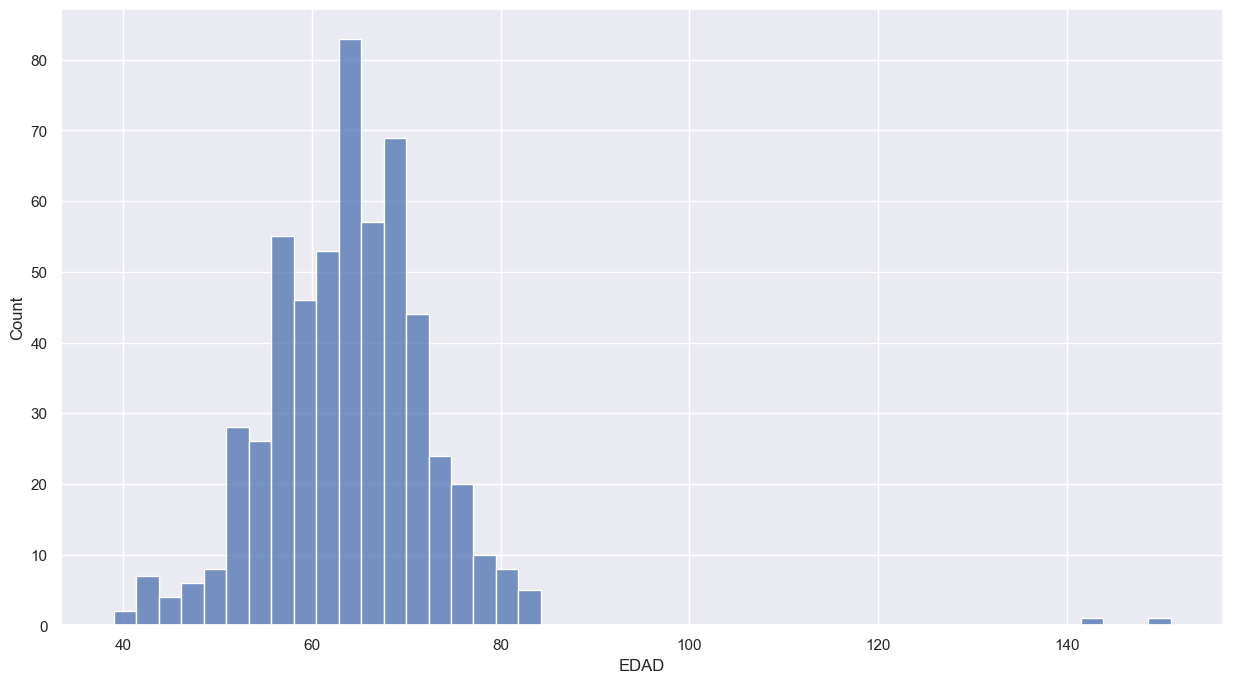

In [548]:
sns.histplot(df.EDAD) # dos valores mayores a 100, eliminemolos

<Axes: xlabel='EDAD', ylabel='Count'>

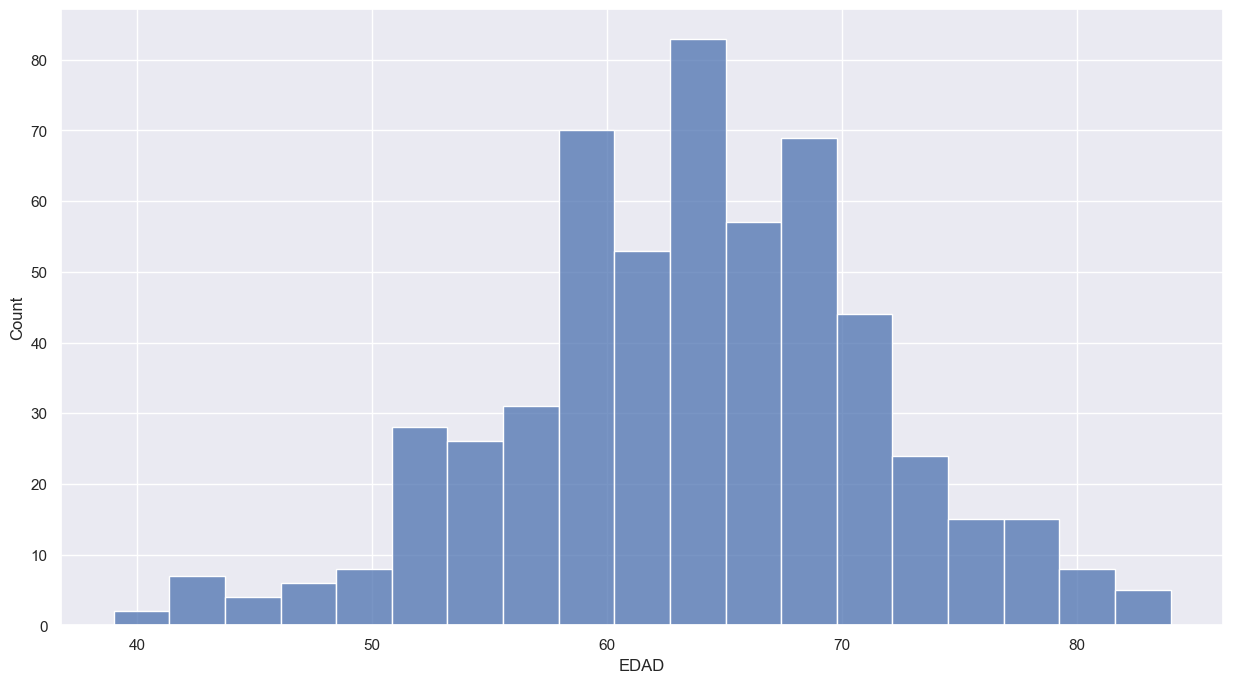

In [549]:
df.drop(index=df[df['EDAD']>100].index,inplace=True)
sns.histplot(df.EDAD) #mucho mejor

In [550]:
df.shape

(555, 16)

In [551]:
df.describe()

,EDAD,DIABETES,HOSP_UM,PSA,BIO_PREV,VOL_PROS,ANTIBIOTICO,CUP,ENF_PUL,BIOPSIA,FIEBRE,ITU,CULTIVO,AG_AIS,RESISTENCIA,HOSPITALIZACION
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,63.634234,0.111712,0.009009,13.368901,0.097297,0.724324,1.079279,0.007207,0.034234,3.524324,0.064865,0.010811,0.014414,0.992793,0.012613,0.041441
std,7.867902,0.315296,0.094573,15.775152,0.296630,0.447257,0.650620,0.084665,0.181994,1.963761,0.246509,0.103505,0.119299,0.119952,0.111696,0.199489
min,39.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,5.600000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,15.300000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,100.000000,1.000000,1.000000,3.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [552]:
df.info()
df_analizado = df.copy() #ya veran para que usamos esto mas adelante

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 564
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDAD             555 non-null    float64
 1   DIABETES         555 non-null    int32  
 2   HOSP_UM          555 non-null    int32  
 3   PSA              555 non-null    float64
 4   BIO_PREV         555 non-null    int32  
 5   VOL_PROS         555 non-null    int32  
 6   ANTIBIOTICO      555 non-null    int32  
 7   CUP              555 non-null    int32  
 8   ENF_PUL          555 non-null    int32  
 9   BIOPSIA          555 non-null    int32  
 10  FIEBRE           555 non-null    int32  
 11  ITU              555 non-null    int32  
 12  CULTIVO          555 non-null    int32  
 13  AG_AIS           555 non-null    int32  
 14  RESISTENCIA      555 non-null    int32  
 15  HOSPITALIZACION  555 non-null    int32  
dtypes: float64(2), int32(14)
memory usage: 43.4 KB


<Axes: >

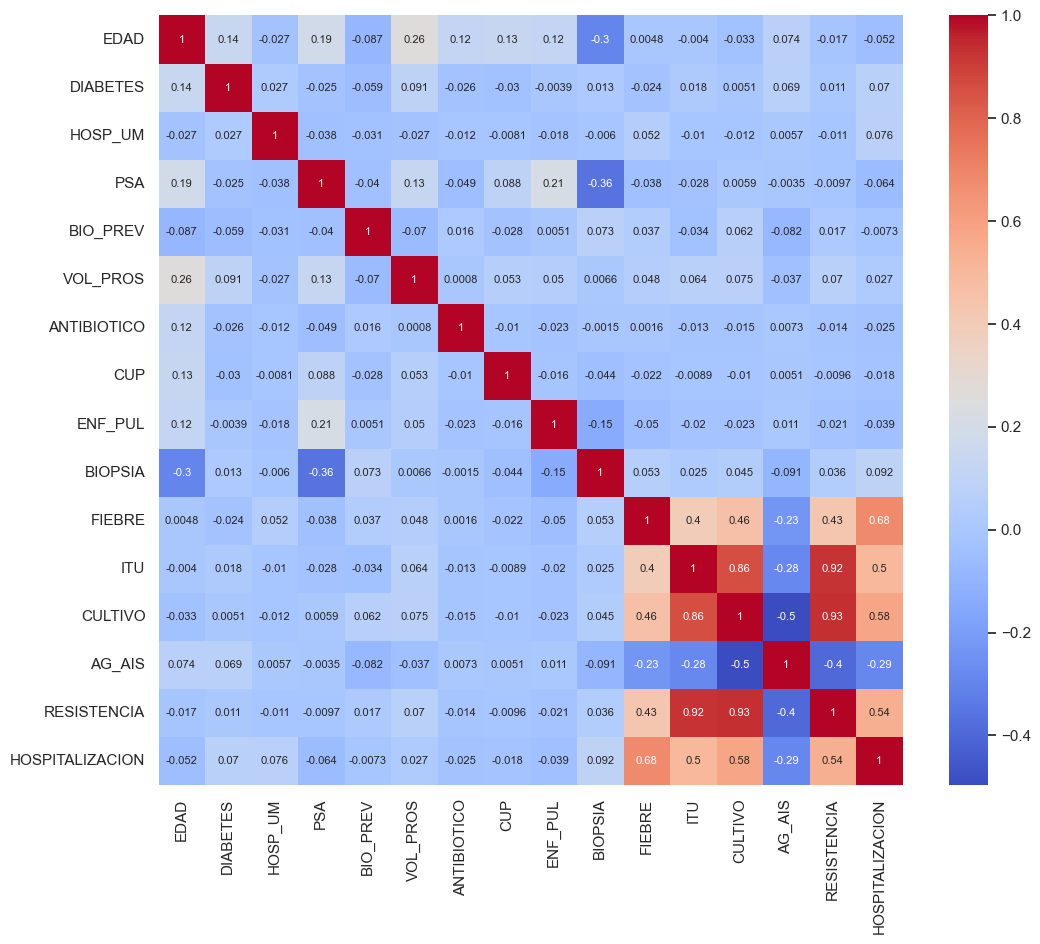

In [553]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size': 8})

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


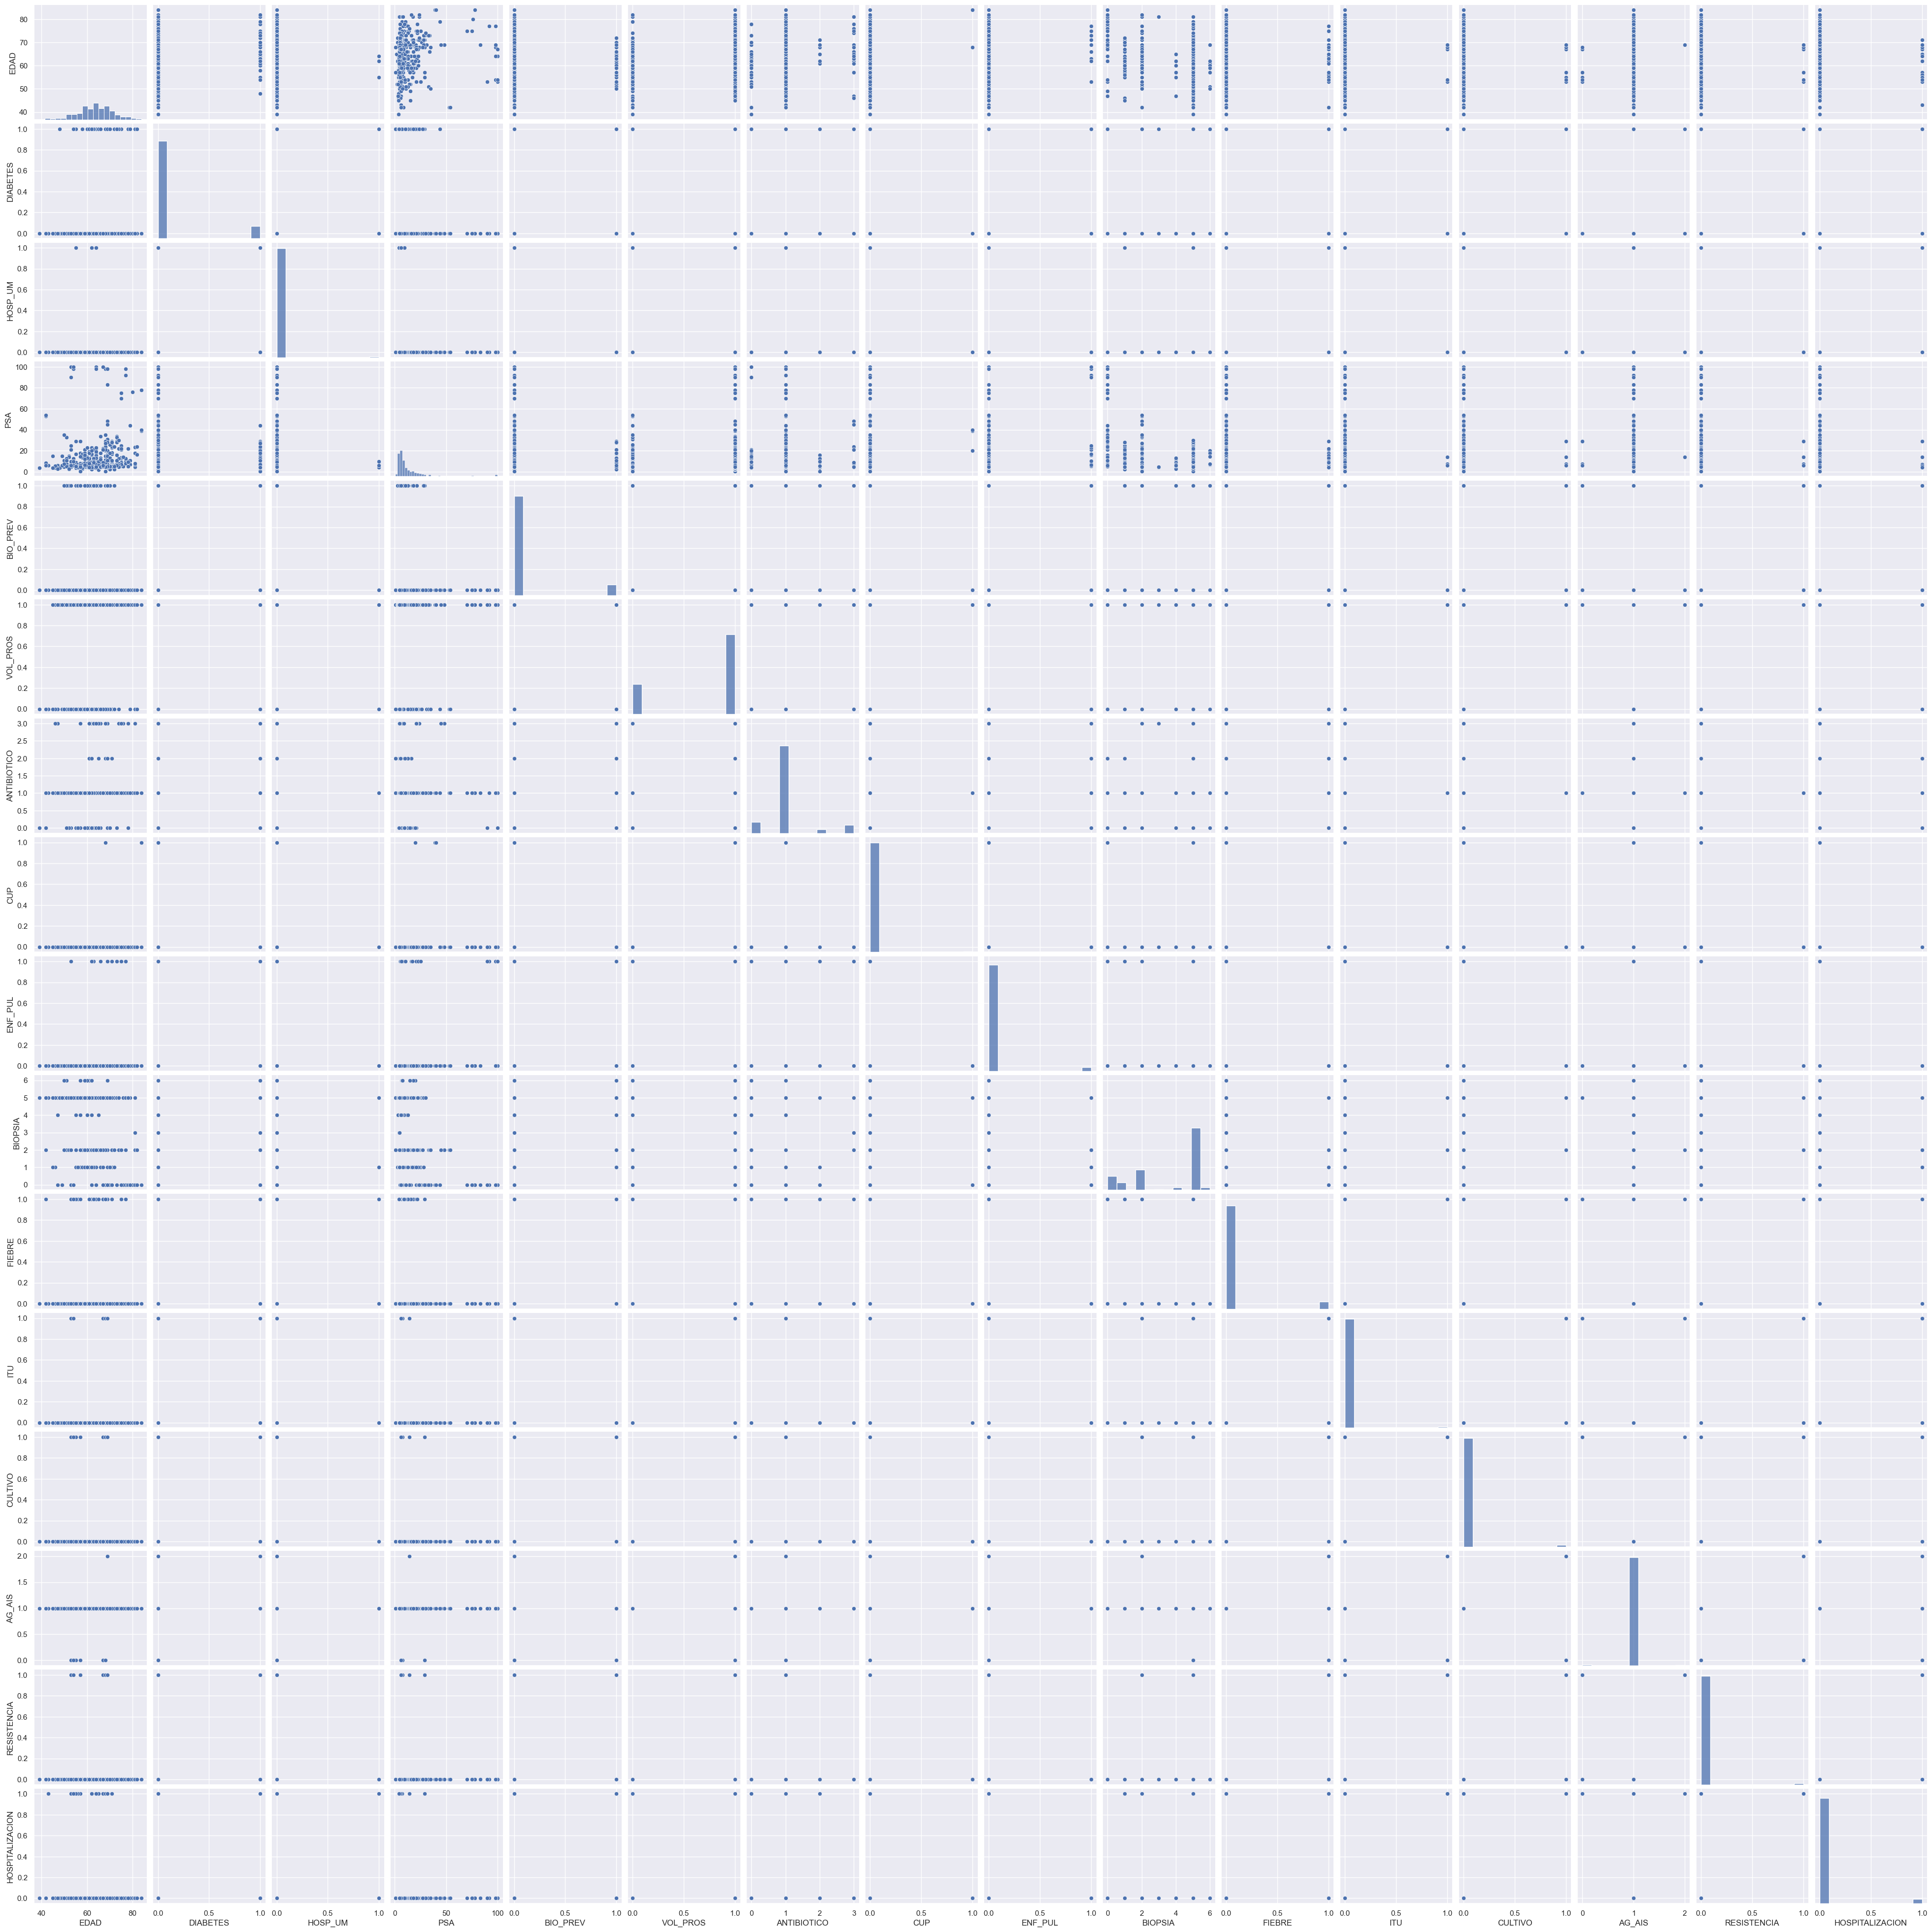

In [554]:
sns.pairplot(df)

# Preparacion de datos

Teniendo en cuenta que ya hicimos que los datos queden codificados, limpiamos los nulos y outliers, vamos a seguir analizando las caracteristicas del sampling:

In [555]:
df_positivos = df[df['HOSPITALIZACION']==1]
df_negativos = df[df['HOSPITALIZACION']==0]
print(f'La cantidad de muestreos negativos son {df_negativos.shape[0]} y los positivos son {df_positivos.shape[0]}')

La cantidad de muestreos negativos son 532 y los positivos son 23


In [556]:
# Tenemos una muestra totalmente subsampleada.... vamos a usar algunas tecnicas de sobresampleo:

X = df.drop(columns='HOSPITALIZACION')
y = df.HOSPITALIZACION

from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(random_state=42)

X_resampled, y_resampled = over.fit_resample(X, y)

In [557]:
y_resampled.value_counts() #magicamente nuestro codigo nos resampleo todo barbaro

HOSPITALIZACION
1    532
0    532
Name: count, dtype: int64

# Modelizacion

In [558]:
# ahora hagamos un pipeline para trabajar todos los datos de una

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [559]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)

In [560]:

models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

log_param = {
    'C':[0.001, 0.01, 0.1, 1.0]
}

dtc_param = {
    'max_depth':[1,2,3,5,10]
}
knn_param = {
    'n_neighbors':[1,2,5,10,15,20,30]
}

svc_param = {
    'C':[0.1,1,10,30],
    'kernel':['linear','poly','sigmoid','rbf']
}

params = [log_param,dtc_param,knn_param,svc_param]

kf = KFold(n_splits=5,shuffle=True,random_state=42)

best_model = []
accuracy = []

for i in range(len(models)):
    pipe = make_pipeline(
        StandardScaler(),
        GridSearchCV(models[i],params[i],cv=kf,scoring='accuracy')
    )
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    model = pipe.named_steps['gridsearchcv']
    best_model.append(model.best_estimator_)
    accuracy.append(accuracy_score(y_test,y_pred))

In [561]:
results = list(zip(best_model,accuracy))

for i in results:
    print(i)

(LogisticRegression(), 0.9548872180451128)
(DecisionTreeClassifier(max_depth=10), 0.9962406015037594)
(KNeighborsClassifier(n_neighbors=1), 1.0)
(SVC(C=30), 0.9962406015037594)


<Axes: >

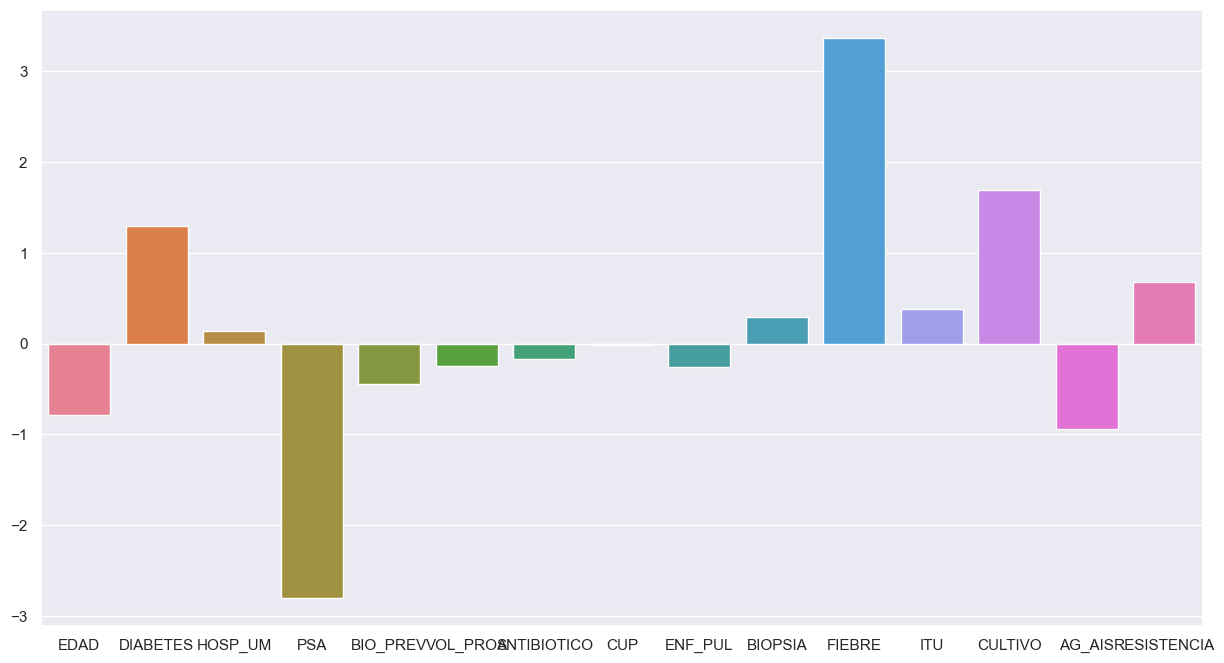

In [562]:
logistic_result = pd.DataFrame(best_model[0].coef_,columns=X.columns)
sns.set(rc={"figure.figsize": (15, 8)})
sns.barplot(logistic_result)


<Axes: >

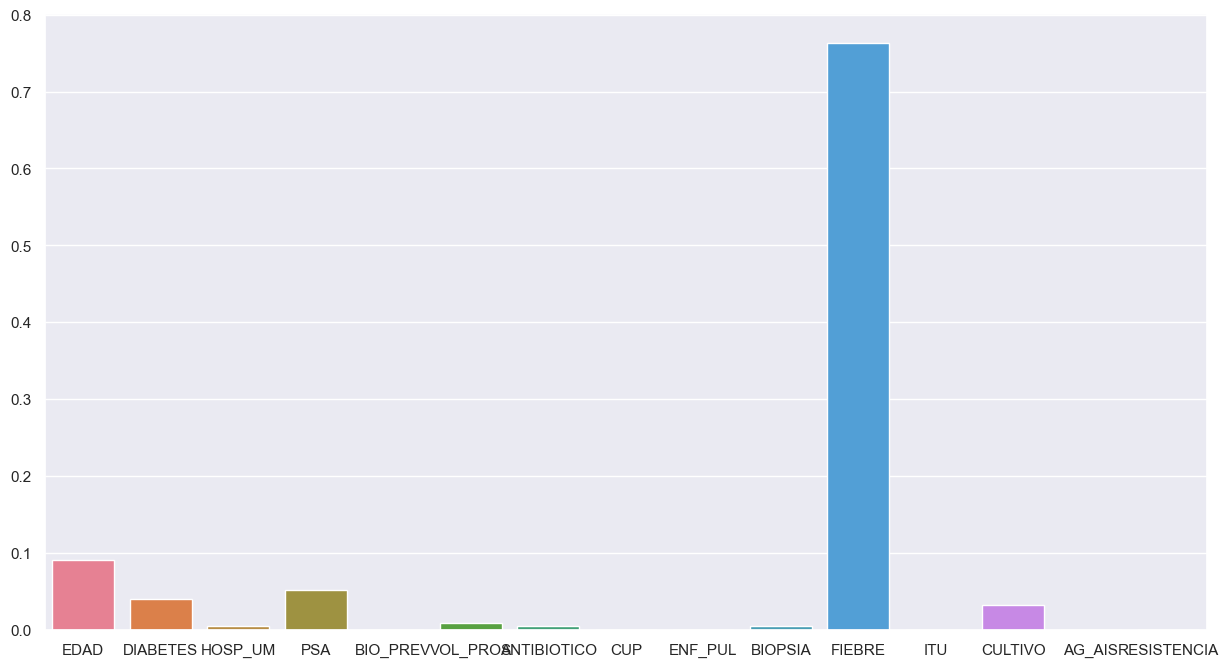

In [563]:
dtc_results = pd.DataFrame(np.reshape(best_model[1].feature_importances_,(1,15)),columns=X.columns)
sns.set(rc={"figure.figsize": (15, 8)})
sns.barplot(dtc_results)

# Inconvenientes

La realidad es que, luego de analizar los datos, me di cuenta que toda la ultima parte de la informacion brindada esta recolectada una ves que el paciente ha vuelto a ser internado, haciendola totalmente correlativa e inutil para nuestro analisis...

Comencemos de nuevo:

In [564]:
# Corremos todo hasta la preparacion de los datos y volvemos a empezar

df_analizado.columns

Index(['EDAD', 'DIABETES', 'HOSP_UM', 'PSA', 'BIO_PREV', 'VOL_PROS',
       'ANTIBIOTICO', 'CUP', 'ENF_PUL', 'BIOPSIA', 'FIEBRE', 'ITU', 'CULTIVO',
       'AG_AIS', 'RESISTENCIA', 'HOSPITALIZACION'],
      dtype='object')

In [565]:
df_analizado.drop(columns=['FIEBRE', 'ITU', 'CULTIVO','AG_AIS', 'RESISTENCIA'],inplace=True) #eliminamos dichas columnas

<Axes: >

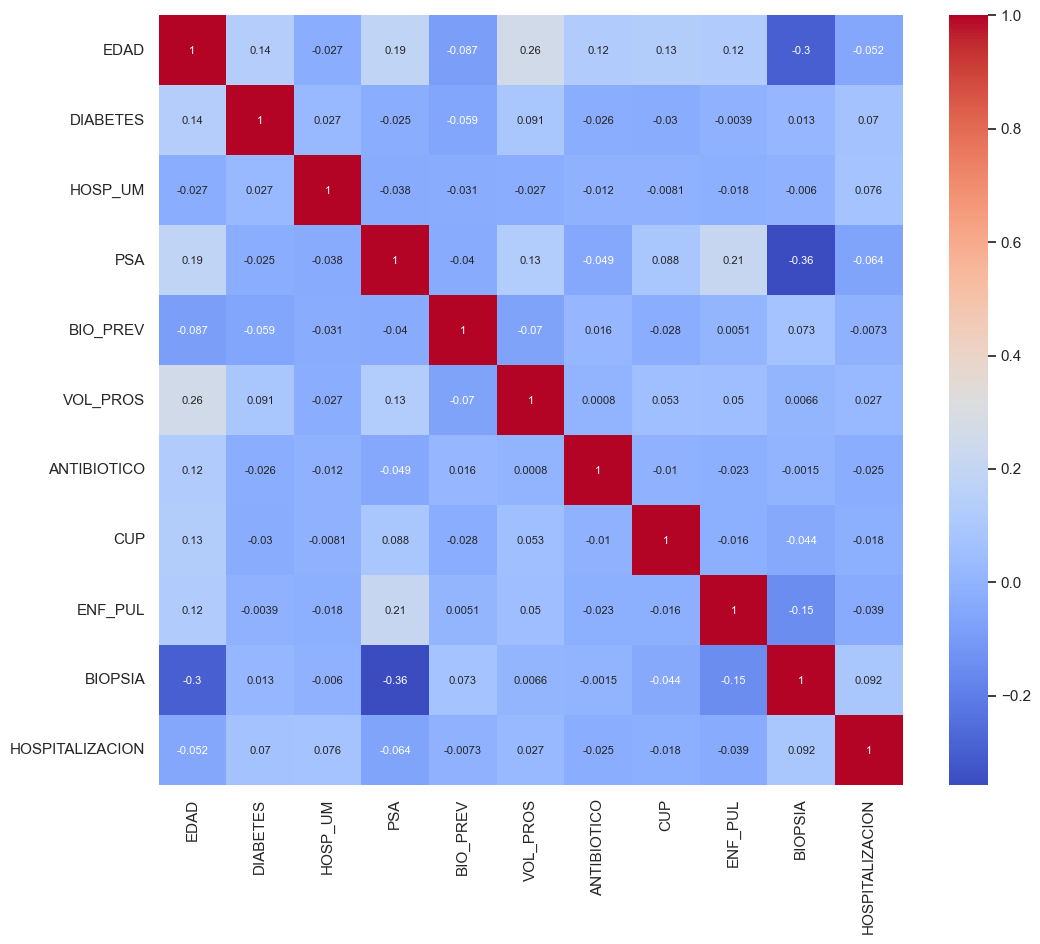

In [566]:
corr = df_analizado.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size': 8}) #ahora se ve como la tenemos mas dificil

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


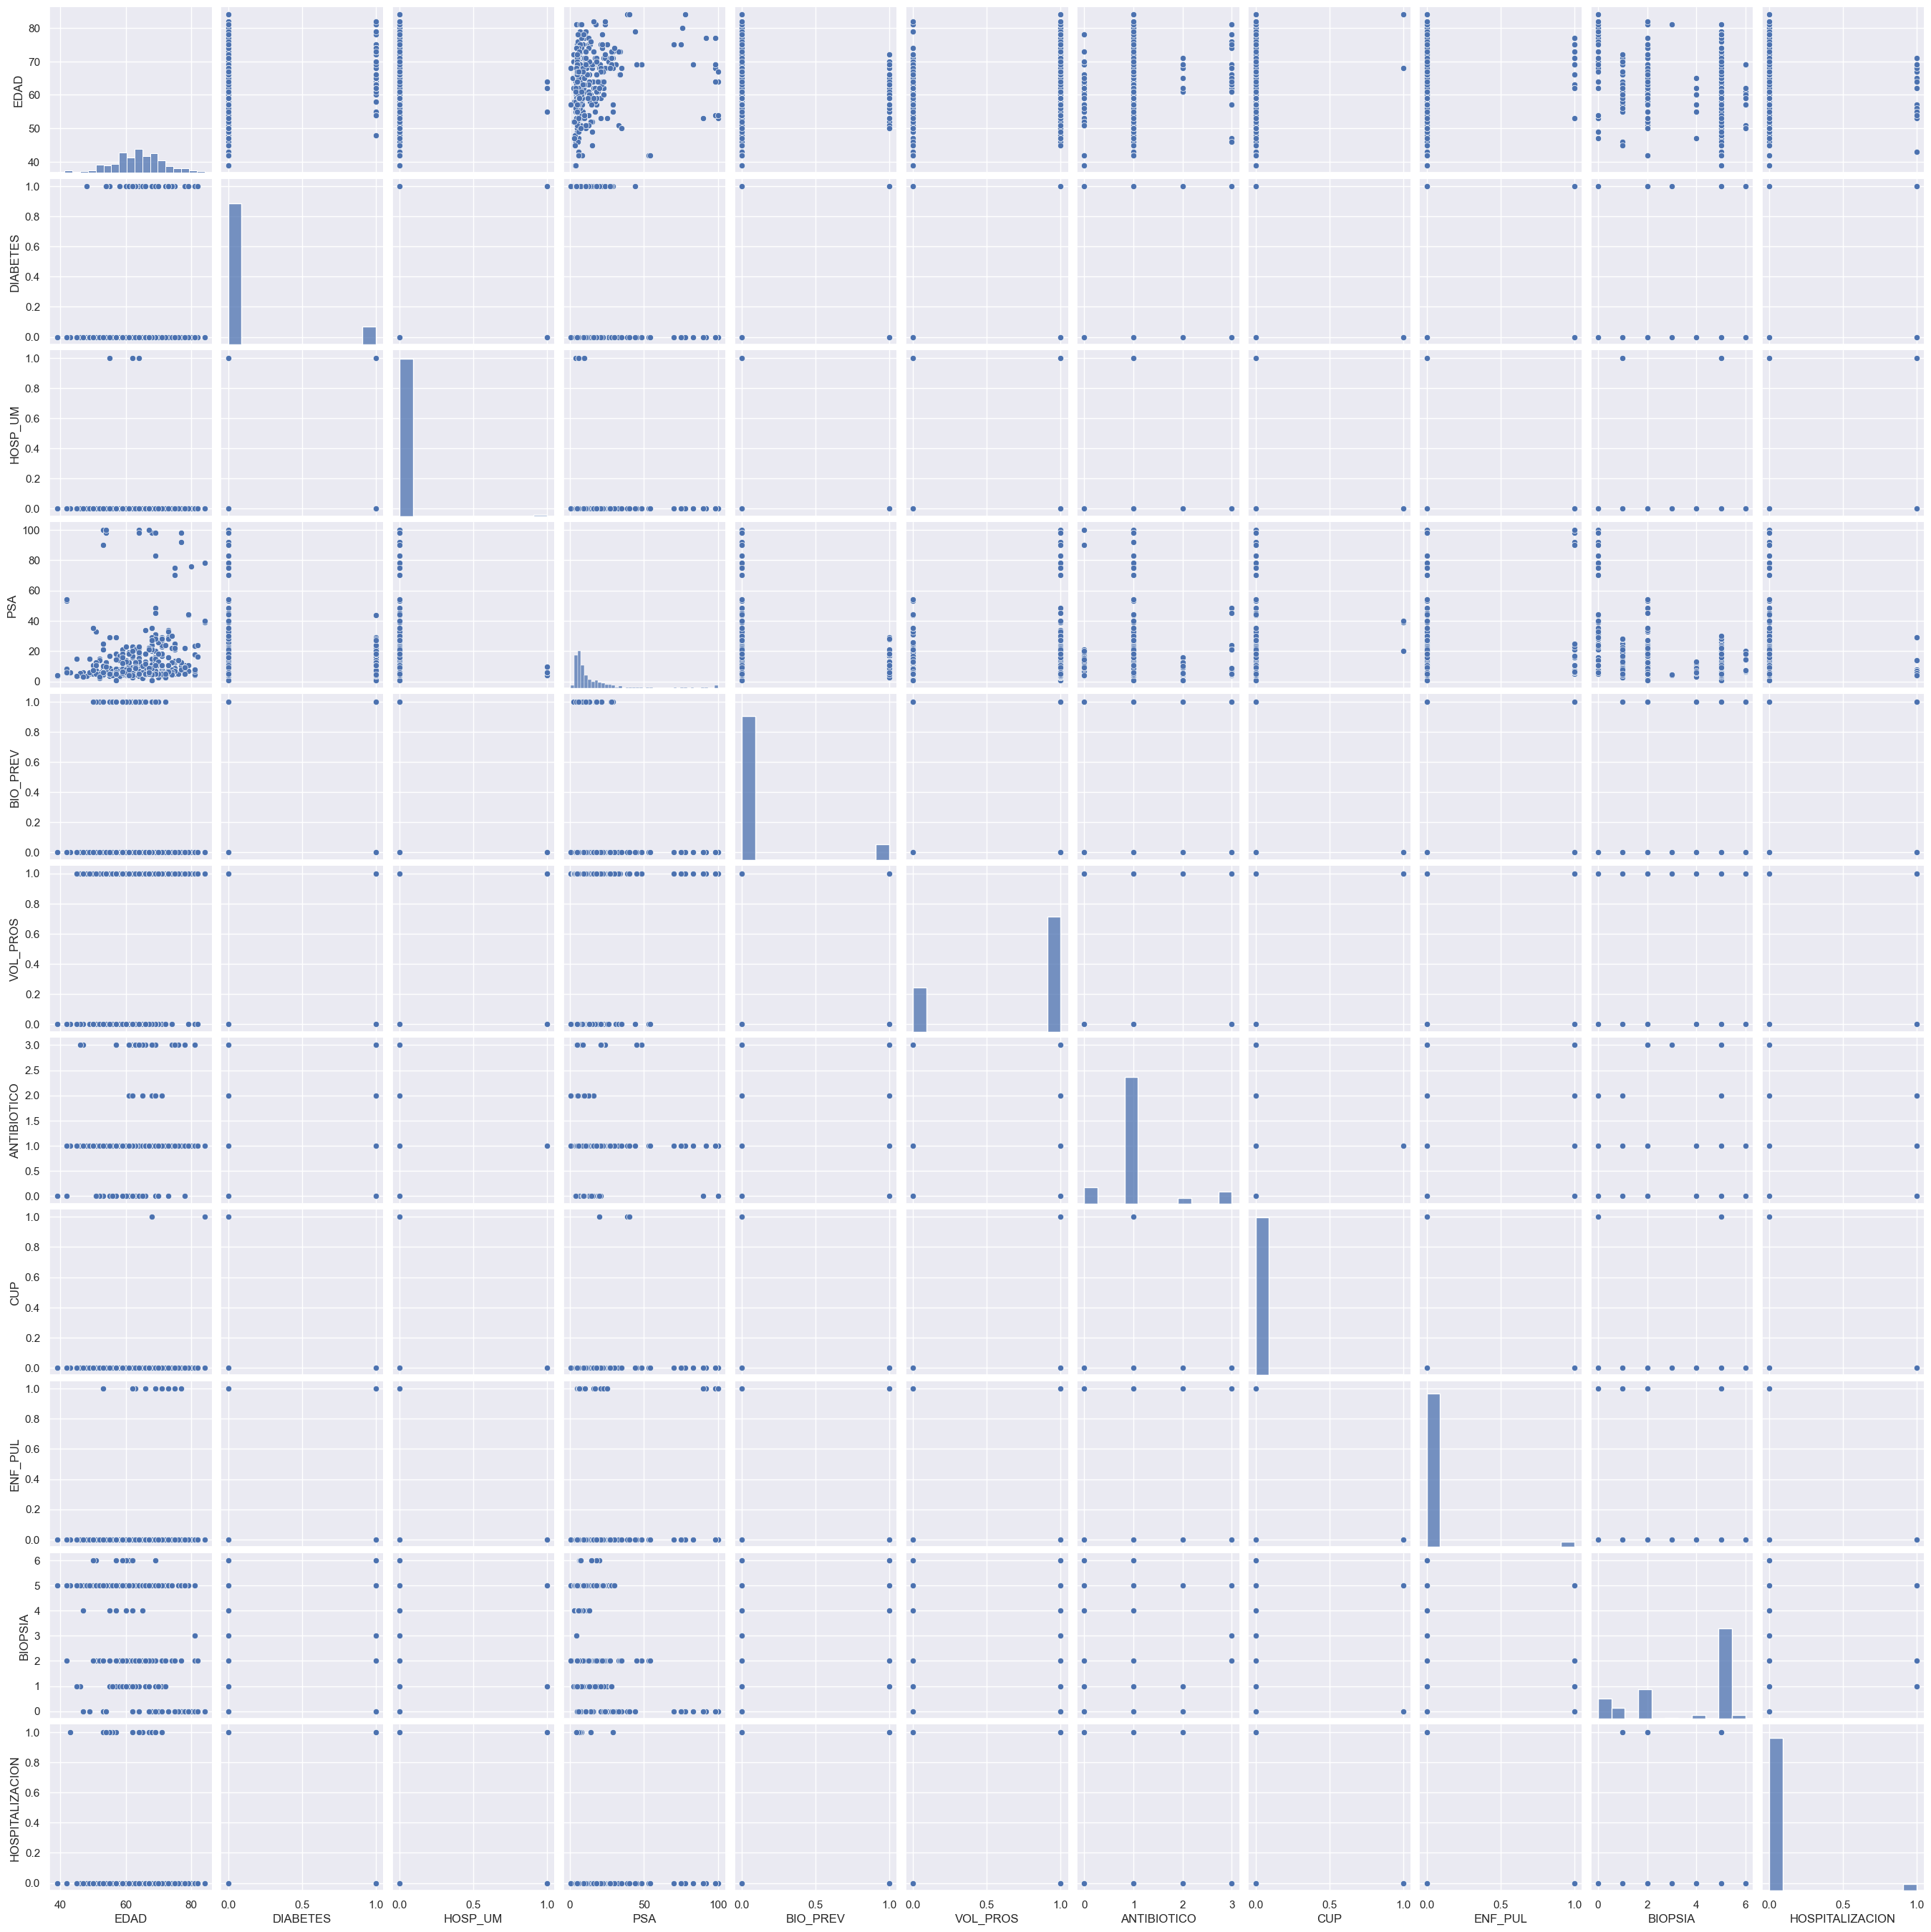

In [567]:
sns.pairplot(df_analizado)

In [568]:
df_positivos = df_analizado[df_analizado['HOSPITALIZACION']==1] #volvamos a samplear
df_negativos = df_analizado[df_analizado['HOSPITALIZACION']==0]
print(f'La cantidad de muestreos negativos son {df_negativos.shape[0]} y los positivos son {df_positivos.shape[0]}')

La cantidad de muestreos negativos son 532 y los positivos son 23


In [569]:
# Tenemos una muestra totalmente subsampleada.... vamos a usar algunas tecnicas de sobresampleo:

X = df_analizado.drop(columns='HOSPITALIZACION')
y = df_analizado.HOSPITALIZACION

from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(random_state=42)

X_resampled, y_resampled = over.fit_resample(X, y)

In [570]:
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)

In [572]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

log_param = {
    'C':[0.001, 0.01, 0.1, 1.0]
}

dtc_param = {
    'max_depth':[1,2,3,5,10]
}
knn_param = {
    'n_neighbors':[1,2,5,10,15,20,30]
}

svc_param = {
    'C':[0.1,1,10,30],
    'kernel':['linear','poly','sigmoid','rbf']
}

params = [log_param,dtc_param,knn_param,svc_param]

kf = KFold(n_splits=5,shuffle=True,random_state=42)

best_model = []
accuracy = []

for i in range(len(models)):
    pipe = make_pipeline(
        GridSearchCV(models[i],params[i],cv=kf,scoring='accuracy')
    )
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    model = pipe.named_steps['gridsearchcv']
    best_model.append(model.best_estimator_)
    accuracy.append(accuracy_score(y_test,y_pred))

results = list(zip(best_model,accuracy))

for i in results:
    print(i)

(LogisticRegression(C=0.01), 0.6015037593984962)
(DecisionTreeClassifier(max_depth=10), 0.9661654135338346)
(KNeighborsClassifier(n_neighbors=1), 0.9699248120300752)
(SVC(C=30), 0.868421052631579)


<Axes: >

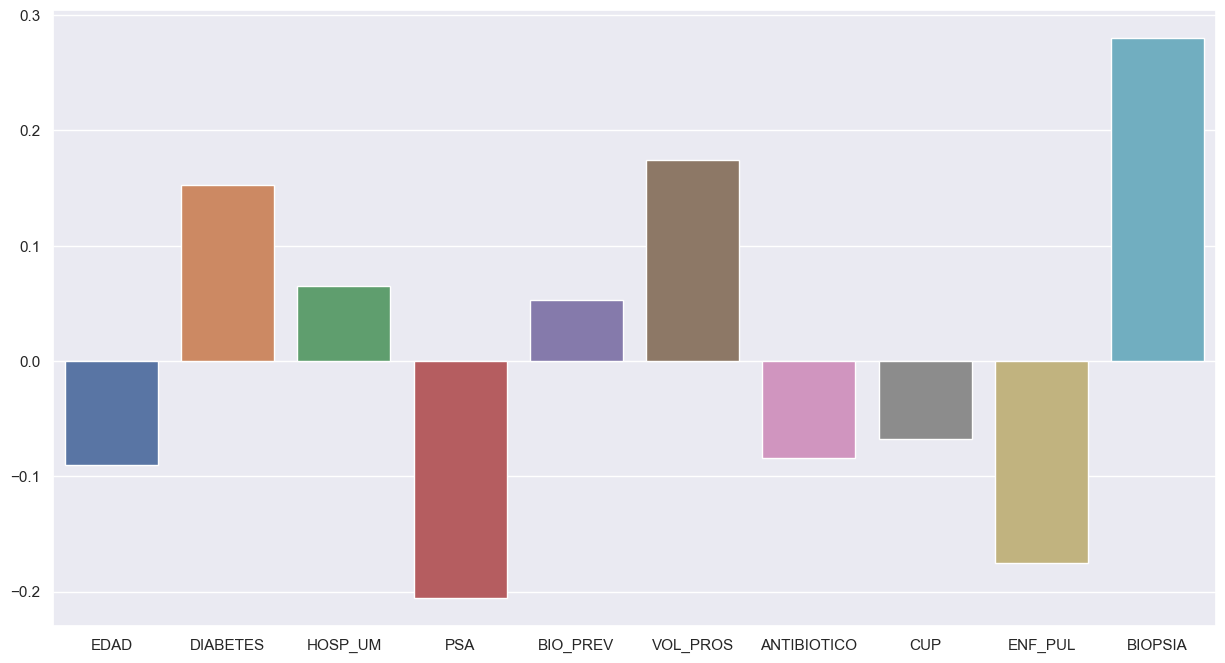

In [573]:
logistic_result = pd.DataFrame(best_model[0].coef_,columns=df_analizado.drop(columns='HOSPITALIZACION').columns)
sns.set(rc={"figure.figsize": (15, 8)})
sns.barplot(logistic_result)

<Axes: >

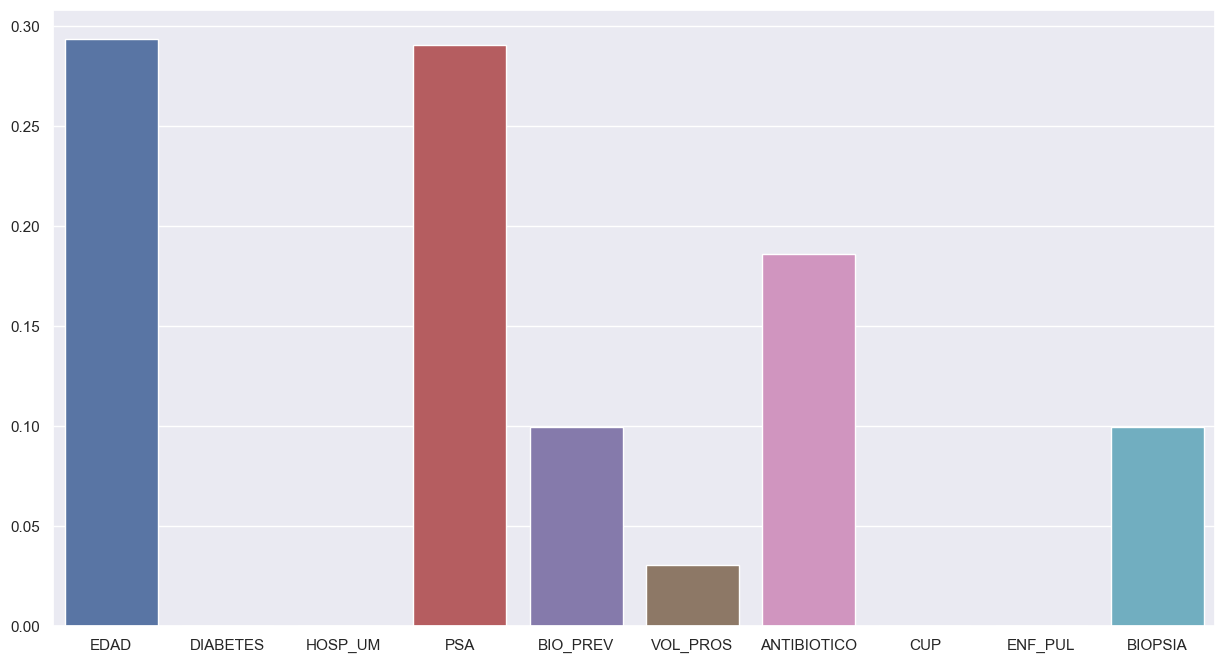

In [574]:
dtc_results = pd.DataFrame(np.reshape(best_model[1].feature_importances_,(1,10)),columns=df_analizado.drop(columns='HOSPITALIZACION').columns)
sns.set(rc={"figure.figsize": (15, 8)})
sns.barplot(dtc_results)

In [575]:
data = pd.DataFrame(X_test, columns=df_analizado.drop(columns='HOSPITALIZACION').columns)
data['target'] = best_model[3].predict(X_test)

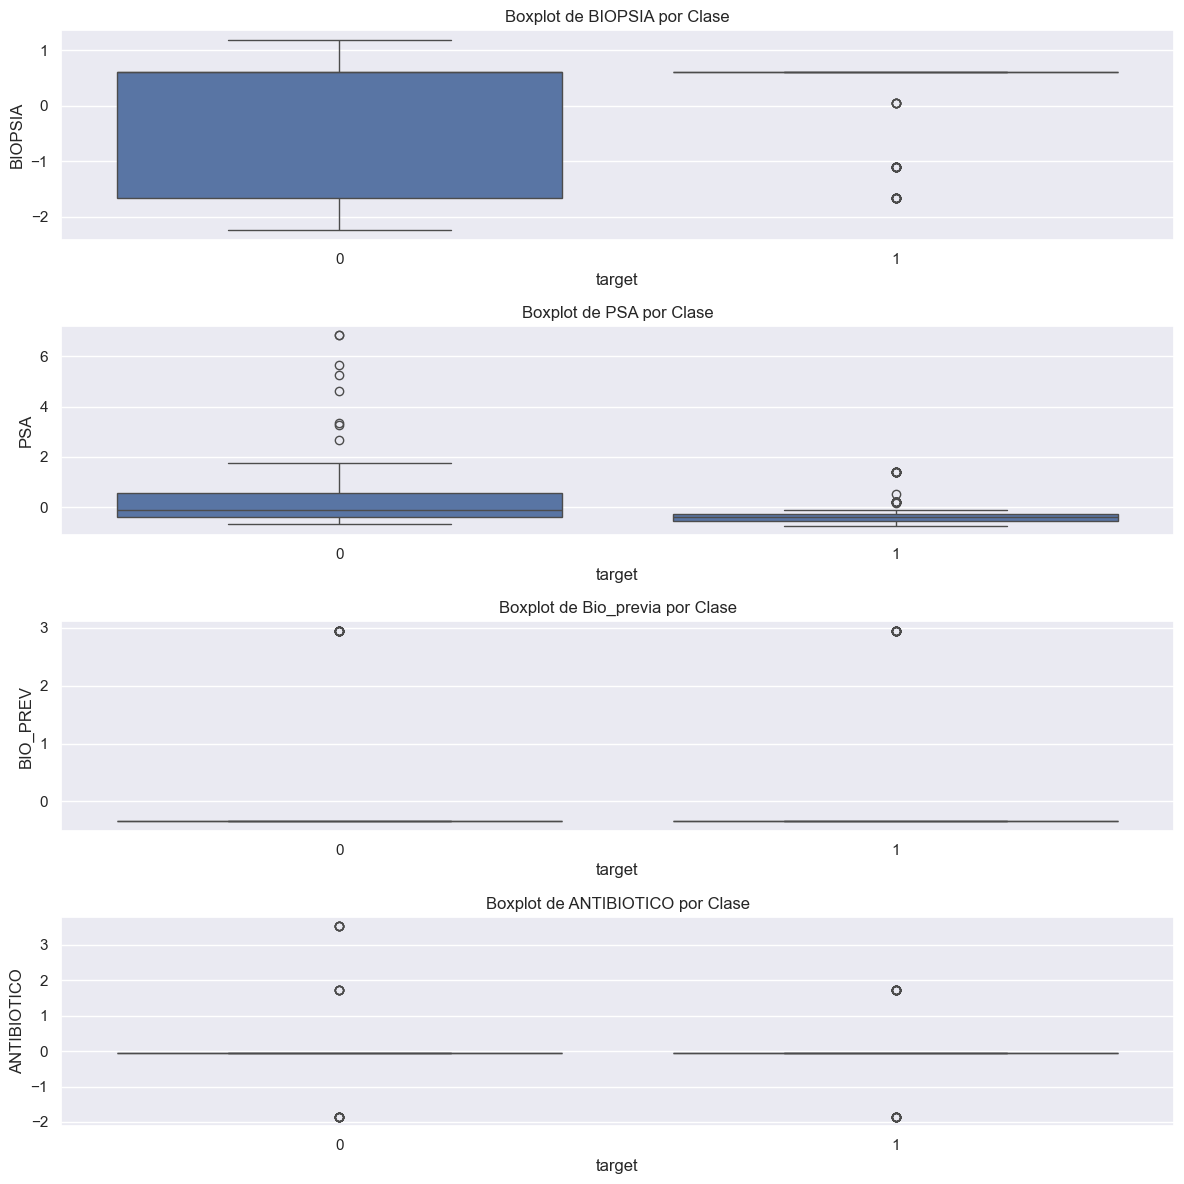

In [576]:
# Visualizar distribución de petal_width para cada clase
fig, ax = plt.subplots(4, 1, figsize=(12, 12))

# Boxplot para 'BIOPSIA'
sns.boxplot(x='target', y='BIOPSIA', data=data, ax=ax[0])
ax[0].set_title('Boxplot de BIOPSIA por Clase')

# Boxplot para 'PSA'
sns.boxplot(x='target', y='PSA', data=data, ax=ax[1])
ax[1].set_title('Boxplot de PSA por Clase')

sns.boxplot(x='target', y='BIO_PREV', data=data, ax=ax[2])
ax[2].set_title('Boxplot de Bio_previa por Clase')

sns.boxplot(x='target', y='ANTIBIOTICO', data=data, ax=ax[3])
ax[3].set_title('Boxplot de ANTIBIOTICO por Clase')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Conclusiones

Tomando los resultados del DTC, que se ajustan lo suficiente a nuestro modelo para poder predecirlo, podemos decir que las variables mas significativas son:

<ul><li>PSA</li><li>Bio_previa</li><li>Antibiotico</li> <li> Biopsia</li></ul>

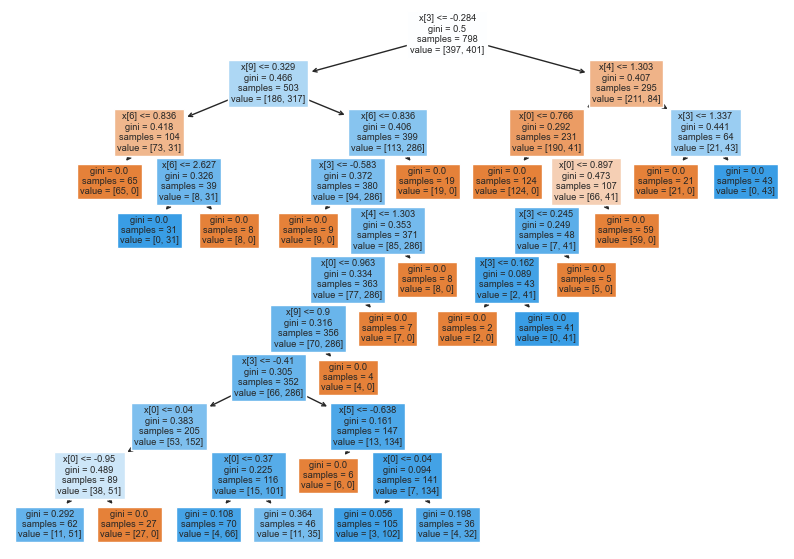

In [577]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))
plot_tree(best_model[1], filled = True)
plt.show()

Analicemos como impacta en DTC:

In [578]:
data = pd.DataFrame(sc.inverse_transform(X_test), columns=df_analizado.drop(columns='HOSPITALIZACION').columns)
data['target'] = best_model[1].predict(X_test)

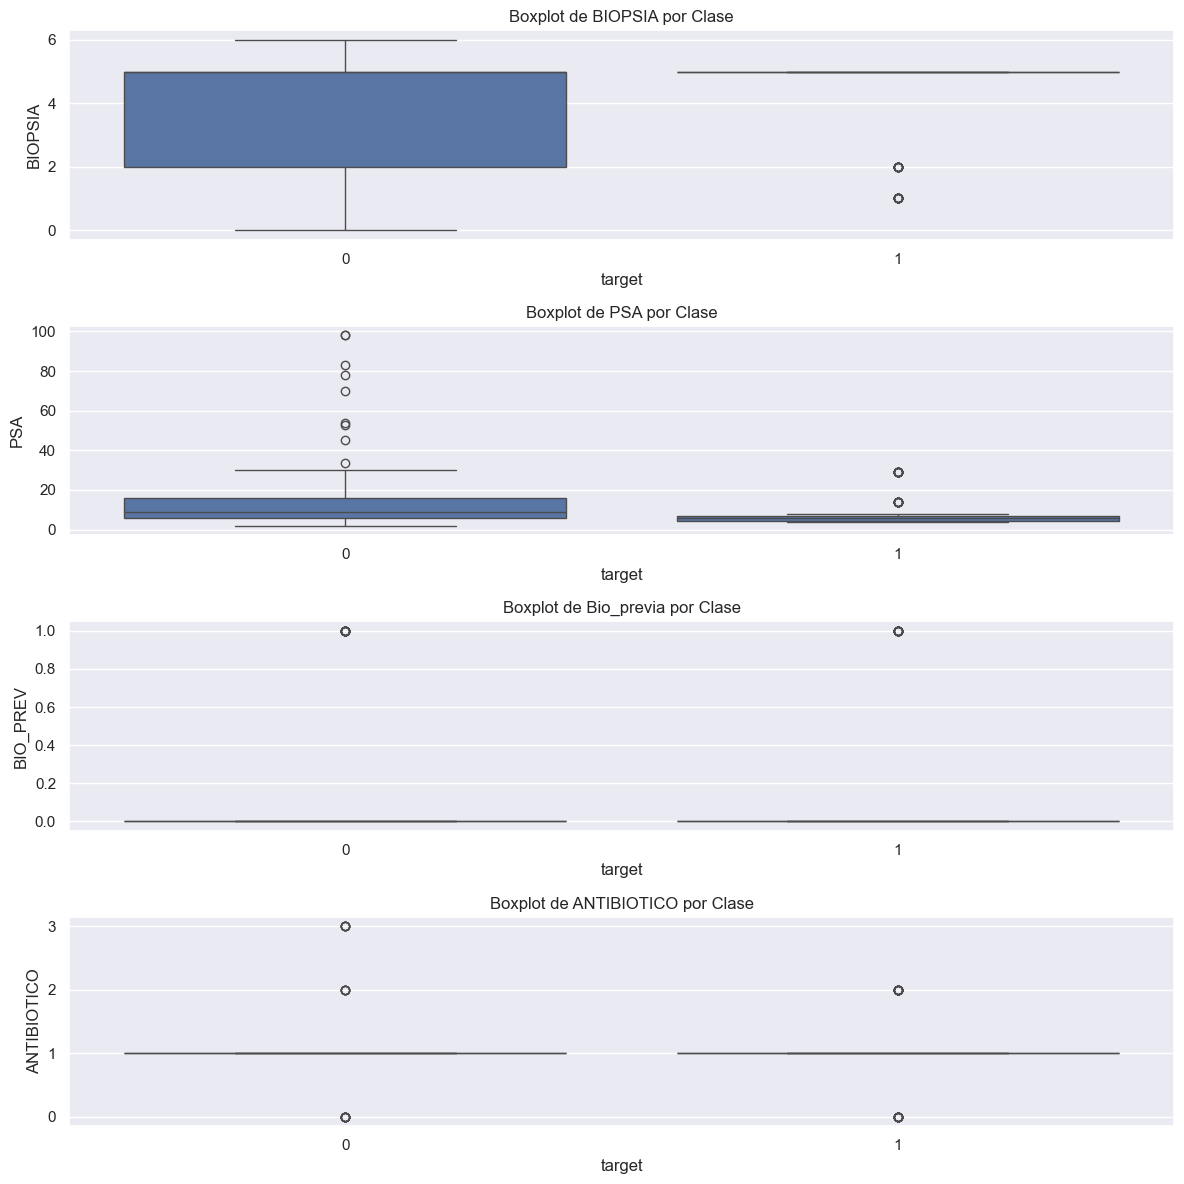

In [579]:
# Visualizar distribución de petal_width para cada clase
fig, ax = plt.subplots(4, 1, figsize=(12, 12))

# Boxplot para 'BIOPSIA'
sns.boxplot(x='target', y='BIOPSIA', data=data, ax=ax[0])
ax[0].set_title('Boxplot de BIOPSIA por Clase')

# Boxplot para 'PSA'
sns.boxplot(x='target', y='PSA', data=data, ax=ax[1])
ax[1].set_title('Boxplot de PSA por Clase')

sns.boxplot(x='target', y='BIO_PREV', data=data, ax=ax[2])
ax[2].set_title('Boxplot de Bio_previa por Clase')

sns.boxplot(x='target', y='ANTIBIOTICO', data=data, ax=ax[3])
ax[3].set_title('Boxplot de ANTIBIOTICO por Clase')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [580]:
for i in correspondencia:
    print(i)

['DIABETES', {'NO': 0, 'SI': 1}]
['HOSPITALIZACIÓN ULTIMO MES', {'NO': 0, 'SI': 1}]
['BIOPSIAS PREVIAS', {'NO': 0, 'SI': 1}]
['VOLUMEN PROSTATICO', {'NO': 0, 'SI': 1}]
['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', {'CEFALOSPORINA_AMINOGLUCOCIDO': 0, 'FLUOROQUINOLONA_AMINOGLICOSIDO': 1, 'OROQUINOLONAS': 2, 'OTROS': 3}]
['CUP', {'NO': 0, 'SI': 1}]
['ENF. CRONICA PULMONAR OBSTRUCTIVA', {'NO': 0, 'SI': 1}]
['FIEBRE', {'NO': 0, 'SI': 1}]
['ITU', {'NO': 0, 'SI': 1}]
['TIPO DE CULTIVO', {'NO': 0, 'SI': 1}]
['AGENTE AISLADO', {'E.COLI': 0, 'NO': 1, 'PSEUDOMONAS AERUGINOSA': 2}]
['BIOPSIA', {'ADENOCARCINOMA GLEASON': 0, 'ADENOCARCINOMA GLEASON 6 ': 1, 'ADENOCARCINOMA GLEASON 7': 2, 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS': 3, 'HIPERPLASIA PROSTATICA': 4, 'NEG': 5, 'PROSTATITIS': 6}]
['HOSPITALIZACION', {'NO': 0, 'SI': 1}]
['PATRON DE RESISTENCIA', {'NO': 0, 'SI': 1}]


# Correlaciones

Completemos ahora lo antes enunciado con las correlaciones:

<ul><li>PSA: El valor tiene un efecto contrario al esperado, a mayor PSA, menor chances hay.</li><li>Bio_previa: No parece tener una incidencia decisiva por si misma.</li><li>Antibiotico: Podemos decir que utilizando otros antibioticos a los mencionados, el tratamiento es mas efectivo. </li> <li> Biopsia: HIperplasia prostatica y carcinoma indiferenciado disminuyen el riesgo de volver</li></ul>

Como podran ver, los resultados no son muy intuitivos y seguramente el metodo de aproximacion tenga variables que no estan siendo consideradas como importantes, asi como existan otras variables con mayor incidencia que no estan registradas. Ellas podrian ser las condiciones de higiene del paciente, el cuidado que le da a la cicatrizacion, si tiene antecedentes de inmunodeficiencia, entre otros.